MSD-I dataset (mapping, metadata, annotations and links to images)
Data splits and feature vectors for TISMIR single-label classification experiments 

In [1]:
import numpy as np
import pandas as pd
import json
import tqdm
from collections import Counter

In [72]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [75]:
def show_image(image, figsize=(16, 9), reverse=True):
    plt.figure(figsize=figsize)
    if reverse:
        plt.imshow(image[...,::-1])
    else:
        plt.imshow(image)
    plt.axis('off')
    plt.show()

In [ ]:
dataset = "../../../data/MSD-I_dataset.tsv"

In [ ]:
dataset_df = pd.read_csv(dataset, sep='\t')

In [ ]:
dataset_df

In [ ]:
dataset_track_ids = set(dataset_df.msd_track_id.values)

In [ ]:
dataset_track_ids

# Lyrics data

In [ ]:
lyrics_train_file = '../../../song-lyrics/data/clean/mxm_dataset.json'

In [ ]:
with open(lyrics_train_file) as json_data:
    data = json.load(json_data)

In [ ]:
len(data['songs'])

In [ ]:
data['songs']

In [ ]:
data['songs'][0]['track_id'] 

In [ ]:
lyrics_ids = []
for song in tqdm.tqdm(data['songs']):
    track_id = song['track_id'] 
    lyrics_ids.append(track_id)

In [ ]:
lyrics_ids_set = set(lyrics_ids)

In [ ]:
data['songs'][0]['track_id'] in dataset_track_ids

In [ ]:
is_in_array = []
for id_ in list(dataset_track_ids):
    is_in_array.append(id_ in lyrics_ids_set)

In [ ]:
Counter(is_in_array)

# Getting songs names

In [ ]:
song_names_file = '../../../lyrics_datasets/unique_tracks.txt'

In [ ]:
song_names_df = pd.read_csv(song_names_file, sep='<SEP>', header=None)

In [ ]:
song_names_df.columns = ['track_id', 'song_id', 'artist_name', 'song_title']

In [ ]:
song_names_df.head()

In [ ]:
len(song_names_df)

In [ ]:
song_names_dict = dict(zip(song_names_df.track_id.values, song_names_df.song_title.values))

In [ ]:
song_names_dict

In [ ]:
dataset_df.head()

In [ ]:
dataset_df['song_title'] = dataset_df['msd_track_id'].copy()

In [ ]:
dataset_df['song_title'] = dataset_df['song_title'].map(song_names_dict)

In [ ]:
dataset_df

In [ ]:
artist_dict = dict(zip(song_names_df.track_id.values, song_names_df.artist_name.values))

In [ ]:
dataset_df['artist'] = dataset_df['msd_track_id'].map(artist_dict)

In [ ]:
len(dataset_df['artist'])

# Getting lyrics

In [ ]:
lyrics_file = '../../../lyrics_datasets/songdata.csv'

In [ ]:
lyrics_df = pd.read_csv(lyrics_file)

In [ ]:
lyrics_df.head()

In [ ]:
lyrics_dict = dict(zip(lyrics_df.song.values, lyrics_df.text.values))

In [ ]:
dataset_df['song_lyrics'] = dataset_df['song_title'].map(lyrics_dict)

In [ ]:
dataset_df['song_lyrics']

In [ ]:
len(dataset_df.song_lyrics)

In [ ]:
len(dataset_df.song_lyrics.dropna())

In [ ]:
dataset_df

In [ ]:
len(dataset_df)

In [ ]:
len(dataset_df) - len(dataset_df.song_lyrics.dropna())

# Load dataset

# Parse lyrics freak

In [3]:
import requests
import bs4
from bs4 import BeautifulSoup

In [4]:
def get_song_link_by_name(artist, song_name, website='https://www.lyricsfreak.com'):
    url = 'https://www.lyricsfreak.com/search.php?q=%s %s' % (artist, song_name)
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    floatfix = soup.find('div', attrs={'class':"maincont floatfix"})
    list_cell = floatfix.find('div', attrs={'class':"lf-list__cell lf-list__meta"})
    if list_cell is not None:
        song_link = list_cell.find('a')['href']
        full_song_link = website + song_link
    else:
        full_song_link=None
    return full_song_link

In [ ]:
get_song_link_by_name(dataset_df.loc[3, 'artist'], dataset_df.loc[3, 'song_title'])

In [ ]:
dataset_df['lyrics_link'] = None

In [ ]:
for i in tqdm.tqdm(range(len(dataset_df))):
    dataset_df.loc[i, 'lyrics_link'] = get_song_link_by_name(dataset_df.loc[i, 'artist'], dataset_df.loc[i, 'song_title'])

In [ ]:
dataset_df.to_csv('dataset.csv', index=False)

In [ ]:
loaded = pd.read_csv('dataset.csv')

In [ ]:
loaded

# Save lyrics

In [5]:
def get_lyrics(url):
    if url is not None:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        share_text = soup.find('div', attrs={'class':"js-share-text"})
        lyrics_txt = share_text.find('div', attrs={'class':"lyrictxt js-lyrics js-share-text-content"})
        filtered_lyrics = filter(lambda x: type(x) == bs4.element.NavigableString and x.strip() != '', lyrics_txt.contents)
        text = ''
        for line in  filtered_lyrics:
            text += line.strip() + ' '
        return text.lower()
    else:
        return None

In [3]:
dataset_df = pd.read_csv('dataset_checkpoint_2.csv')

In [4]:
dataset_df.head()

,msd_track_id,genre,album_index,set,msd_artist_id,image_url,song_title,song_lyrics,artist,lyrics_link,lyrics_text
0,TRABKJU128F422A7FE,Metal,0,train,ARBD4QW1187FB42153,http://artwork-cdn.7static.com/static/img/slee...,The Illusionist,NaN,Scar Symmetry,https://www.lyricsfreak.com/s/scar+symmetry/th...,as an outcast i paced defeat seeking comfort i...
1,TRBLDQQ128F92E58B4,Rock,1,train,AR3RK011187FB3CE3B,http://artwork-cdn.7static.com/static/img/slee...,Tuolumne,NaN,Eddie Vedder,NaN,NaN
2,TRDMMDE128F14A9052,Rock,2,train,ARJVTRE1187B9959C0,http://artwork-cdn.7static.com/static/img/slee...,Weekend Driver,NaN,Foghat,https://www.lyricsfreak.com/f/foghat/weekend+d...,dave peverett - riff bros. music - ascap waiti...
3,TRJOPZB128F4250E02,Rock,4,train,AR62BB21187B9AC83D,http://artwork-cdn.7static.com/static/img/slee...,Too Alive,NaN,The Breeders,https://www.lyricsfreak.com/b/breeders/too+ali...,i took off when will will make no way steal it...
4,TRJKBVL128F935567B,Rock,5,train,AR7GVOV1187B9B5FF1,http://artwork-cdn.7static.com/static/img/slee...,Ride The Darker Wave,NaN,Sebadoh,https://www.lyricsfreak.com/s/sebadoh/ride+the...,you make your words so nice i'm waiting you to...


In [8]:
for i in tqdm.tqdm(range(len(dataset_df))):
    try:
        if dataset_df.loc[i, 'lyrics_link'] is None and dataset_df.loc[i, 'lyrics_text'] is None:
            dataset_df.loc[i, 'lyrics_link'] = get_song_link_by_name(dataset_df.loc[i, 'artist'], dataset_df.loc[i, 'song_title'])
        dataset_df.loc[i, 'lyrics_text'] = get_lyrics(dataset_df.loc[i, 'lyrics_link'])
        if i != 0 and i % 1000 == 0:
            dataset_df.to_csv('dataset_checkpoint_2.csv', index=False)
    except:
        pass

100%|██████████| 30713/30713 [34:16<00:00, 14.94it/s]   


In [9]:
dataset_df

,msd_track_id,genre,album_index,set,msd_artist_id,image_url,song_title,song_lyrics,artist,lyrics_link,lyrics_text
0,TRABKJU128F422A7FE,Metal,0,train,ARBD4QW1187FB42153,http://artwork-cdn.7static.com/static/img/slee...,The Illusionist,NaN,Scar Symmetry,https://www.lyricsfreak.com/s/scar+symmetry/th...,as an outcast i paced defeat seeking comfort i...
1,TRBLDQQ128F92E58B4,Rock,1,train,AR3RK011187FB3CE3B,http://artwork-cdn.7static.com/static/img/slee...,Tuolumne,NaN,Eddie Vedder,NaN,NaN
2,TRDMMDE128F14A9052,Rock,2,train,ARJVTRE1187B9959C0,http://artwork-cdn.7static.com/static/img/slee...,Weekend Driver,NaN,Foghat,https://www.lyricsfreak.com/f/foghat/weekend+d...,dave peverett - riff bros. music - ascap waiti...
3,TRJOPZB128F4250E02,Rock,4,train,AR62BB21187B9AC83D,http://artwork-cdn.7static.com/static/img/slee...,Too Alive,NaN,The Breeders,https://www.lyricsfreak.com/b/breeders/too+ali...,i took off when will will make no way steal it...
4,TRJKBVL128F935567B,Rock,5,train,AR7GVOV1187B9B5FF1,http://artwork-cdn.7static.com/static/img/slee...,Ride The Darker Wave,NaN,Sebadoh,https://www.lyricsfreak.com/s/sebadoh/ride+the...,you make your words so nice i'm waiting you to...
5,TRUSOQD128F92CFEA5,Rock,7,train,ARZHQDD1187FB5B871,http://artwork-cdn.7static.com/static/img/slee...,Carmen,Last night she ran away \nLeft a letter by th...,Lush,https://www.lyricsfreak.com/l/lush/carmen_2008...,(anderson/berenyi) carmen tells me what she's ...
6,TRKCEWE128F425BF56,Rock,9,train,ARRSEGJ1187B9A67D9,http://artwork-cdn.7static.com/static/img/slee...,Skizziert,NaN,Bosse,NaN,NaN
7,TRRCUNU128F932C084,Reggae,10,train,ARDI8UK1187FB369FB,http://artwork-cdn.7static.com/static/img/slee...,Eurose,NaN,Ohrbooten,NaN,NaN
8,TRRNTLC128F93366F6,Rock,11,train,ARTNHBW1187B9A5482,http://artwork-cdn.7static.com/static/img/slee...,Sugar Spun Sister,Her hair \nSoft drifted snow \nDeath white ...,The Stone Roses,https://www.lyricsfreak.com/s/stone+roses/suga...,her hair soft drifted snow death white i'd lik...
9,TRSEIMP12903CE2A6B,Reggae,12,train,ARP06GY1187B98B0F0,http://artwork-cdn.7static.com/static/img/slee...,Imperial Version,NaN,Yami Bolo,NaN,NaN


In [ ]:
dataset_df.isna

In [13]:
l = np.array(dataset_df.song_lyrics.isna())

In [15]:
~l

array([False, False, False, ..., False,  True, False])

In [16]:
l_ = np.array(dataset_df.lyrics_text.isna())

In [18]:
~l_

array([ True, False,  True, ..., False, False, False])

In [23]:
res = ~l | ~l_

In [24]:
np.count_nonzero(res)

10744

In [ ]:
print ('f')

In [ ]:
for i in tqdm.tqdm(range(len(dataset_df))):
    #dataset_df.loc[i, 'lyrics_link'] = get_song_link_by_name(dataset_df.loc[i, 'artist'], dataset_df.loc[i, 'song_title'])

# Work with dataset

In [5]:
dataset_df = pd.read_csv('dataset_checkpoint_2.csv')

In [6]:
dataset_df.head()

,msd_track_id,genre,album_index,set,msd_artist_id,image_url,song_title,song_lyrics,artist,lyrics_link,lyrics_text
0,TRABKJU128F422A7FE,Metal,0,train,ARBD4QW1187FB42153,http://artwork-cdn.7static.com/static/img/slee...,The Illusionist,NaN,Scar Symmetry,https://www.lyricsfreak.com/s/scar+symmetry/th...,as an outcast i paced defeat seeking comfort i...
1,TRBLDQQ128F92E58B4,Rock,1,train,AR3RK011187FB3CE3B,http://artwork-cdn.7static.com/static/img/slee...,Tuolumne,NaN,Eddie Vedder,NaN,NaN
2,TRDMMDE128F14A9052,Rock,2,train,ARJVTRE1187B9959C0,http://artwork-cdn.7static.com/static/img/slee...,Weekend Driver,NaN,Foghat,https://www.lyricsfreak.com/f/foghat/weekend+d...,dave peverett - riff bros. music - ascap waiti...
3,TRJOPZB128F4250E02,Rock,4,train,AR62BB21187B9AC83D,http://artwork-cdn.7static.com/static/img/slee...,Too Alive,NaN,The Breeders,https://www.lyricsfreak.com/b/breeders/too+ali...,i took off when will will make no way steal it...
4,TRJKBVL128F935567B,Rock,5,train,AR7GVOV1187B9B5FF1,http://artwork-cdn.7static.com/static/img/slee...,Ride The Darker Wave,NaN,Sebadoh,https://www.lyricsfreak.com/s/sebadoh/ride+the...,you make your words so nice i'm waiting you to...


In [9]:
song_lyrics = dataset_df.song_lyrics.values

In [12]:
np.isnan(song_lyrics[0])

True

In [26]:
song_lyrics[0]

nan

In [28]:
type(song_lyrics[0])

float

In [35]:
type(song_lyrics[5])

str

In [13]:
lyrics_text = dataset_df.lyrics_text.values

In [22]:
lyrics_text[0]

"as an outcast i paced defeat seeking comfort in this painful retreat made an oracle against my will word spread of miraculous skills premonitions call my name i once doubted them all when they came now i embrace it and i'll never be the same transfixed in the desert sands take a look at my once empty hand see the rose that appears so real just like the one you saw in your dreams those who call me avatar know not what they're looking for they just feed their flames with miracles just so you know if you bathe within my light you diminish your own might the illusionist in everyone as an outcast i faced defeat seeking comfort in this painful retreat made an oracle against my will word spread of miraculous skills premonitions call my name i once doubted them all when they came now i embrace it and i'll never be the same those who call me avatar know not what they're looking for they just feed their flames with miracles just so you know if you bathe within my light you diminish your own mig

In [38]:
type(lyrics_text[1])

float

In [14]:
len(song_lyrics) == len(lyrics_text)

True

In [15]:
t = None

In [19]:
type(t) == None

False

In [20]:
t is None

True

In [43]:
lyrics = []
indices = []
for index_, (i, j) in enumerate(zip(song_lyrics, lyrics_text)):
    text = None
    #if not np.isnan(i):
    if not type(i) == float:
        text = i
    #if not np.isnan(j):
    if not type(j) == float:
        text = j
    lyrics.append(text)
    if not text is None:
        indices.append(index_)

In [45]:
len(indices)

10382

In [47]:
len(lyrics)

30713

In [48]:
dataset_df['lyrics'] = lyrics

In [50]:
dataset_clean = dataset_df.loc[indices]

In [51]:
dataset_clean.shape

(10382, 12)

In [52]:
dataset_clean

,msd_track_id,genre,album_index,set,msd_artist_id,image_url,song_title,song_lyrics,artist,lyrics_link,lyrics_text,lyrics
0,TRABKJU128F422A7FE,Metal,0,train,ARBD4QW1187FB42153,http://artwork-cdn.7static.com/static/img/slee...,The Illusionist,NaN,Scar Symmetry,https://www.lyricsfreak.com/s/scar+symmetry/th...,as an outcast i paced defeat seeking comfort i...,as an outcast i paced defeat seeking comfort i...
2,TRDMMDE128F14A9052,Rock,2,train,ARJVTRE1187B9959C0,http://artwork-cdn.7static.com/static/img/slee...,Weekend Driver,NaN,Foghat,https://www.lyricsfreak.com/f/foghat/weekend+d...,dave peverett - riff bros. music - ascap waiti...,dave peverett - riff bros. music - ascap waiti...
3,TRJOPZB128F4250E02,Rock,4,train,AR62BB21187B9AC83D,http://artwork-cdn.7static.com/static/img/slee...,Too Alive,NaN,The Breeders,https://www.lyricsfreak.com/b/breeders/too+ali...,i took off when will will make no way steal it...,i took off when will will make no way steal it...
4,TRJKBVL128F935567B,Rock,5,train,AR7GVOV1187B9B5FF1,http://artwork-cdn.7static.com/static/img/slee...,Ride The Darker Wave,NaN,Sebadoh,https://www.lyricsfreak.com/s/sebadoh/ride+the...,you make your words so nice i'm waiting you to...,you make your words so nice i'm waiting you to...
5,TRUSOQD128F92CFEA5,Rock,7,train,ARZHQDD1187FB5B871,http://artwork-cdn.7static.com/static/img/slee...,Carmen,Last night she ran away \nLeft a letter by th...,Lush,https://www.lyricsfreak.com/l/lush/carmen_2008...,(anderson/berenyi) carmen tells me what she's ...,(anderson/berenyi) carmen tells me what she's ...
8,TRRNTLC128F93366F6,Rock,11,train,ARTNHBW1187B9A5482,http://artwork-cdn.7static.com/static/img/slee...,Sugar Spun Sister,Her hair \nSoft drifted snow \nDeath white ...,The Stone Roses,https://www.lyricsfreak.com/s/stone+roses/suga...,her hair soft drifted snow death white i'd lik...,her hair soft drifted snow death white i'd lik...
10,TRHDZSB128F429112F,Metal,13,train,ARZN98V1187B990D1D,http://artwork-cdn.7static.com/static/img/slee...,Emerald crown,NaN,THERION,https://www.lyricsfreak.com/t/therion/emerald+...,during the war that took place in heaven the b...,during the war that took place in heaven the b...
11,TRYDOAY128E0794924,Rock,14,train,ARKL75U1187FB5B8B6,http://artwork-cdn.7static.com/static/img/slee...,Closer To Free (Live),NaN,BoDeans,https://www.lyricsfreak.com/b/bodeans/closer+t...,yeah everybody wants to live how they wanna li...,yeah everybody wants to live how they wanna li...
12,TRAQKWU128F4251685,Rock,16,train,ARYMCJZ1187FB513DA,http://artwork-cdn.7static.com/static/img/slee...,Penelope,Penelope works in the market \nDown in the co...,Of Montreal,https://www.lyricsfreak.com/o/of+montreal/pene...,penelope shoot the apple off my head i need to...,penelope shoot the apple off my head i need to...
14,TREXUGD128F1460F54,Rock,18,train,AR00RBU1187B9B3F1F,http://artwork-cdn.7static.com/static/img/slee...,Only Meant To Say,NaN,Matthew Jay,https://www.lyricsfreak.com/m/matthew+jay/only...,everything could die tomorrow would you still ...,everything could die tomorrow would you still ...


In [53]:
dataset_clean.to_csv("dataset_clean.csv", index=False)

In [55]:
loaded = pd.read_csv("dataset_clean.csv")

In [56]:
loaded.se

,msd_track_id,genre,album_index,set,msd_artist_id,image_url,song_title,song_lyrics,artist,lyrics_link,lyrics_text,lyrics
0,TRABKJU128F422A7FE,Metal,0,train,ARBD4QW1187FB42153,http://artwork-cdn.7static.com/static/img/slee...,The Illusionist,NaN,Scar Symmetry,https://www.lyricsfreak.com/s/scar+symmetry/th...,as an outcast i paced defeat seeking comfort i...,as an outcast i paced defeat seeking comfort i...
1,TRDMMDE128F14A9052,Rock,2,train,ARJVTRE1187B9959C0,http://artwork-cdn.7static.com/static/img/slee...,Weekend Driver,NaN,Foghat,https://www.lyricsfreak.com/f/foghat/weekend+d...,dave peverett - riff bros. music - ascap waiti...,dave peverett - riff bros. music - ascap waiti...
2,TRJOPZB128F4250E02,Rock,4,train,AR62BB21187B9AC83D,http://artwork-cdn.7static.com/static/img/slee...,Too Alive,NaN,The Breeders,https://www.lyricsfreak.com/b/breeders/too+ali...,i took off when will will make no way steal it...,i took off when will will make no way steal it...
3,TRJKBVL128F935567B,Rock,5,train,AR7GVOV1187B9B5FF1,http://artwork-cdn.7static.com/static/img/slee...,Ride The Darker Wave,NaN,Sebadoh,https://www.lyricsfreak.com/s/sebadoh/ride+the...,you make your words so nice i'm waiting you to...,you make your words so nice i'm waiting you to...
4,TRUSOQD128F92CFEA5,Rock,7,train,ARZHQDD1187FB5B871,http://artwork-cdn.7static.com/static/img/slee...,Carmen,Last night she ran away \nLeft a letter by th...,Lush,https://www.lyricsfreak.com/l/lush/carmen_2008...,(anderson/berenyi) carmen tells me what she's ...,(anderson/berenyi) carmen tells me what she's ...
5,TRRNTLC128F93366F6,Rock,11,train,ARTNHBW1187B9A5482,http://artwork-cdn.7static.com/static/img/slee...,Sugar Spun Sister,Her hair \nSoft drifted snow \nDeath white ...,The Stone Roses,https://www.lyricsfreak.com/s/stone+roses/suga...,her hair soft drifted snow death white i'd lik...,her hair soft drifted snow death white i'd lik...
6,TRHDZSB128F429112F,Metal,13,train,ARZN98V1187B990D1D,http://artwork-cdn.7static.com/static/img/slee...,Emerald crown,NaN,THERION,https://www.lyricsfreak.com/t/therion/emerald+...,during the war that took place in heaven the b...,during the war that took place in heaven the b...
7,TRYDOAY128E0794924,Rock,14,train,ARKL75U1187FB5B8B6,http://artwork-cdn.7static.com/static/img/slee...,Closer To Free (Live),NaN,BoDeans,https://www.lyricsfreak.com/b/bodeans/closer+t...,yeah everybody wants to live how they wanna li...,yeah everybody wants to live how they wanna li...
8,TRAQKWU128F4251685,Rock,16,train,ARYMCJZ1187FB513DA,http://artwork-cdn.7static.com/static/img/slee...,Penelope,Penelope works in the market \nDown in the co...,Of Montreal,https://www.lyricsfreak.com/o/of+montreal/pene...,penelope shoot the apple off my head i need to...,penelope shoot the apple off my head i need to...
9,TREXUGD128F1460F54,Rock,18,train,AR00RBU1187B9B3F1F,http://artwork-cdn.7static.com/static/img/slee...,Only Meant To Say,NaN,Matthew Jay,https://www.lyricsfreak.com/m/matthew+jay/only...,everything could die tomorrow would you still ...,everything could die tomorrow would you still ...


# Stats

In [86]:
import collections
d = {2:3, 1:89, 4:5, 3:0}
od = collections.OrderedDict(sorted(d.items()))

In [58]:
dataset_clean.shape

(10382, 12)

In [60]:
Counter(dataset_clean.set)

Counter({'train': 8332, 'val': 1004, 'test': 1046})

In [87]:
train_stats = Counter(dataset_clean[dataset_clean.set == 'train'].genre)
train_stats = collections.OrderedDict(sorted(train_stats.items()))

In [88]:
val_stats = Counter(dataset_clean[dataset_clean.set == 'val'].genre)
val_stats = collections.OrderedDict(sorted(val_stats.items()))

In [89]:
test_stats = Counter(dataset_clean[dataset_clean.set == 'test'].genre)
test_stats = collections.OrderedDict(sorted(test_stats.items()))

In [101]:
len(train_stats)

15

In [90]:
train_stats

OrderedDict([('Blues', 137),
             ('Country', 627),
             ('Electronic', 684),
             ('Folk', 304),
             ('Jazz', 543),
             ('Latin', 72),
             ('Metal', 724),
             ('New Age', 42),
             ('Pop', 1153),
             ('Punk', 204),
             ('Rap', 646),
             ('Reggae', 312),
             ('RnB', 555),
             ('Rock', 2297),
             ('World', 32)])

In [102]:
train_stats.keys()

odict_keys(['Blues', 'Country', 'Electronic', 'Folk', 'Jazz', 'Latin', 'Metal', 'New Age', 'Pop', 'Punk', 'Rap', 'Reggae', 'RnB', 'Rock', 'World'])

In [104]:
" ".join(train_stats.keys())

'Blues Country Electronic Folk Jazz Latin Metal New Age Pop Punk Rap Reggae RnB Rock World'

In [91]:
val_stats

OrderedDict([('Blues', 28),
             ('Country', 66),
             ('Electronic', 102),
             ('Folk', 33),
             ('Jazz', 105),
             ('Latin', 1),
             ('Metal', 100),
             ('New Age', 25),
             ('Pop', 209),
             ('Punk', 21),
             ('Rap', 63),
             ('Reggae', 33),
             ('RnB', 78),
             ('Rock', 137),
             ('World', 3)])

In [92]:
test_stats

OrderedDict([('Blues', 45),
             ('Country', 48),
             ('Electronic', 102),
             ('Folk', 24),
             ('Jazz', 121),
             ('Latin', 3),
             ('Metal', 58),
             ('New Age', 8),
             ('Pop', 169),
             ('Punk', 10),
             ('Rap', 79),
             ('Reggae', 64),
             ('RnB', 118),
             ('Rock', 194),
             ('World', 3)])

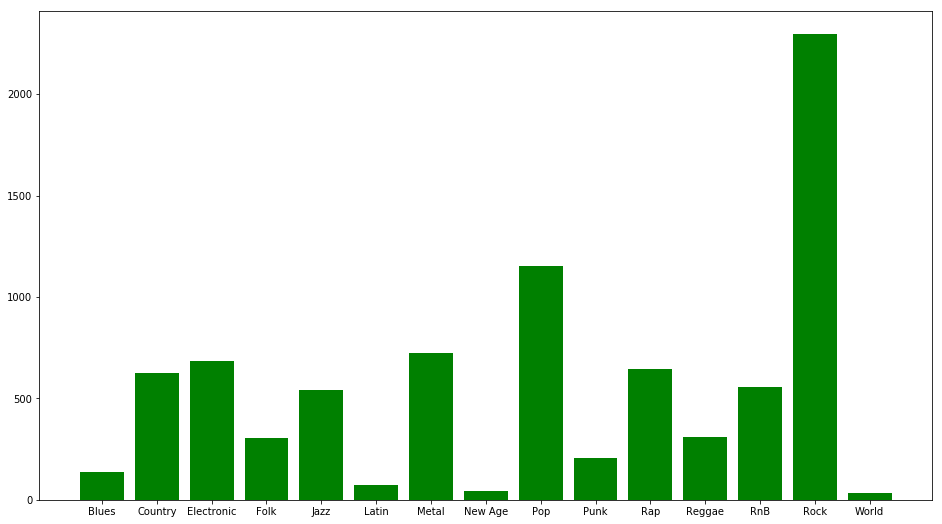

In [93]:
plt.figure(figsize=(16, 9))
plt.bar(list(train_stats.keys()), train_stats.values(), color='g')
plt.show()

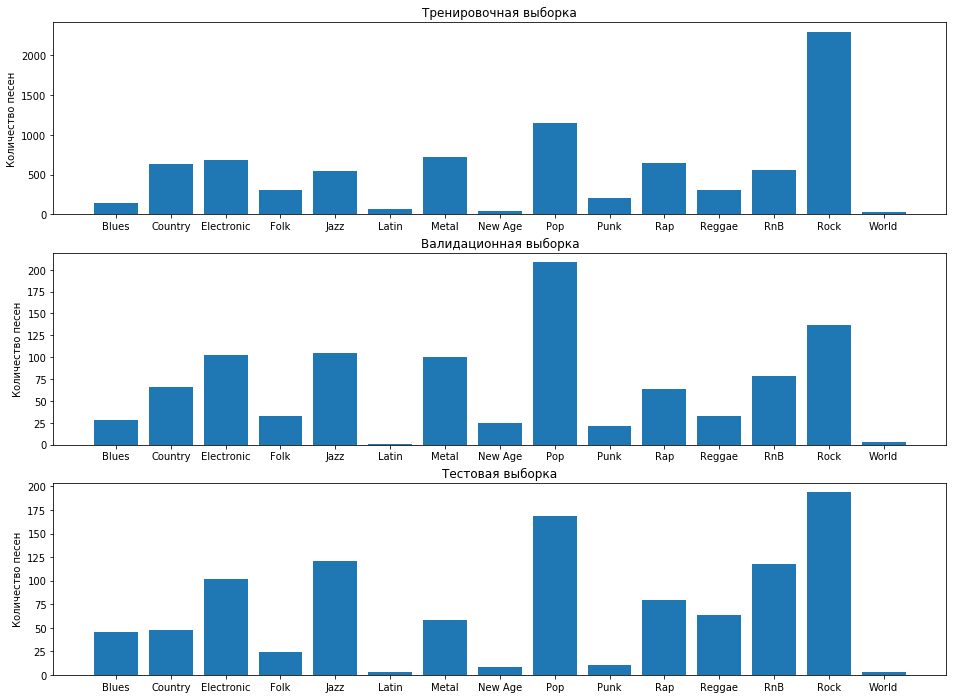

In [100]:
plt.figure(figsize=(16, 12))

plt.subplot(3, 1, 1)
plt.bar(list(train_stats.keys()), train_stats.values())
plt.title('Тренировочная выборка')
plt.ylabel('Количество песен')

plt.subplot(3, 1, 2)
plt.bar(list(val_stats.keys()), val_stats.values())
plt.title('Валидационная выборка')
plt.ylabel('Количество песен')

plt.subplot(3, 1, 3)
plt.bar(list(test_stats.keys()), test_stats.values())
plt.title('Тестовая выборка')
plt.ylabel('Количество песен')
plt.savefig('train_test_split.jpg')
plt.show()